In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
hotel = pd.read_csv("./data/Hotel_Reviews.csv")
hotel.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [ ]:
print(hotel.duplicated().sum())
print(hotel.isnull().sum())

526
Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64


In [ ]:
hotel.drop_duplicates(inplace=True)
hotel = hotel.drop(columns=["lat", "lng"])

# Prepare new dataset for hotel recommendation

In [ ]:
remove_labels = ["Additional_Number_of_Scoring", "Review_Date", "Review_Total_Negative_Word_Counts",
                 "Review_Total_Positive_Word_Counts", "Total_Number_of_Reviews_Reviewer_Has_Given",
                 "days_since_review"]
recom_hotel = hotel.drop(columns=remove_labels)

In [ ]:
recom_hotel.to_csv("./data/hotel_recommendation_based_on_review.csv", index=False)

# Preprocessing review content

In [ ]:
import enchant
from pattern.text.en import singularize
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from nltk import word_tokenize
import re
from nltk.corpus import stopwords

In [ ]:
eng_stops = set(stopwords.words("english"))
en_dict = enchant.Dict("en_US")

def isValid(en_word):
  return (en_word not in eng_stops and
          en_dict.check(en_word) and
          len(en_word) > 2)


def clean_text(text):
  text = " ".join(re.findall("[a-z,.]+", text.lower()))
  text = [word for word in word_tokenize(text) if isValid(word)]
  text = " ".join(text)
  return text

In [ ]:
hotel["Negative_Review"] = hotel["Negative_Review"].apply(lambda x: x.replace("No Negative", ""))
hotel["Positive_Review"] = hotel["Positive_Review"].apply(lambda x: x.replace("No Positive", ""))

In [ ]:
hotel["Review_content"] = hotel["Negative_Review"] + hotel["Positive_Review"]
hotel["Review_content"] = hotel["Review_content"].apply(lambda x: clean_text(x))

In [ ]:
hotel["Review_content"][0]

'angry made post available via possible sites use planing trips one make mistake booking place made booking via booking com stayed nights hotel upon arrival placed small room floor hotel turned room booked specially reserved level duplex room would big windows high ceilings room mind broken window closed hello rain mini fridge contained sort bio weapon least guessed smell intimately asked change room explaining times booked duplex costs simple double got way volume due high ceiling offered room next day check next day clock order get room waned best way begin holiday wait till order check new room wonderful waist time room got wanted peaceful internal garden view big window tired waiting room placed belongings rushed city evening turned constant noise room guess made vibrating vent tubes something constant annoying hell stop even making hard fall asleep wife audio recording attach want send via mail next day technician came able determine cause disturbing sound offered change room hote

In [ ]:
with open("./data/corpus.txt", "w") as corpus:
  for review in hotel["Review_content"].to_numpy():
    corpus.write(review + "\n")

In [ ]:
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")

In [ ]:
no_review = 250000
reviews = np.random.choice(hotel["Review_content"].to_numpy(), size=no_review)

In [ ]:
vocab = dict()
for i, review in enumerate(reviews):
  if i % 10000 == 0:
    print(i)
  doc = nlp(review)
  for token in doc:
    if "NN" in token.tag_:
      vocab[token.lemma_] = vocab.get(token.lemma_, 0) + 1

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000


In [ ]:
sorted_dict = sorted(vocab.items(), reverse=True, key=lambda item: item[1])
len(sorted_dict)

11582

In [ ]:
vocab_df = pd.DataFrame(sorted_dict, columns=["word", "count"])
vocab_df.to_csv("./data/vocab.csv")

In [ ]:
test = nlp(clean_text("did you know a thtt anna 056work here 0000asdfasdf?"))
for word in test.iter_words():
  print(singularize(word.text.lower()) + " " + word.upos)

know VERB
anna PROPN
work NOUN


In [ ]:
texts = [
    hotel["Review_content"][0],
    hotel["Review_content"][1]
]

nlp = spacy.load("en_core_web_sm")

doc = nlp(texts[0])
for sent in doc.sents:
    print(sent)

# for token in nlp(texts[0]):
#     if token.pos_ == "NOUN":
#         print(token.text, token.lemma_, token.pos_)

 I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but
only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin yo

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
sentence = "haha that email and this e-mail"
print(word_tokenize(sentence))

['haha', 'that', 'email', 'and', 'this', 'e-mail']


In [ ]:
print(nlp.vocab)

In [ ]:
vocal_raw_data = hotel["Review_content"].values[:50000]

In [ ]:
vocal_raw_data

array(['angry made post available via possible use one make mistake booking place made booking via booking stayed nights hotel upon arrival small room floor hotel turned room booked specially reserved level duplex room would big high room mind broken window closed hello rain sort weapon least smell intimately change room explaining times booked duplex simple double got way volume due high ceiling room next day check next day clock order get room waned best way begin holiday wait till order check new room wonderful waist time room got peaceful internal garden view big window tired waiting room rushed city evening turned constant noise room guess made vibrating vent something constant annoying hell stop even making hard fall asleep wife audio recording attach want send via e mail next day technician came able determine cause disturbing sound change room hotel fully booked room left one smaller park outside hotel beautiful',
       'real hotel great great location surroundings service two

In [ ]:
vocal = {}
iters = 1
for review in vocal_raw_data:
  if iters == 50000:
    break
  iters += 1
  doc = nlp(review)
  for word in doc.iter_words():
    if word.upos=="NOUN":
      vocal[singularize(word.text.lower())] = 1

In [ ]:
nouns = set(vocal.keys())

5888

In [ ]:
freq = {}
for review in hotel["Review_content"]:
  for word in word_tokenize(review):
    if word in nouns:
      freq[word] = freq.get(word, 0) + 1

In [ ]:
freq = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))

In [ ]:
vocal = list(freq.keys())[:1000]
vocal_df = pd.DataFrame(vocal, columns=["Word"])
vocal_df.to_csv("./data/vocal.csv", index=False)

In [ ]:
df = pd.DataFrame(data=test, columns=vectorizer.get_feature_names_out())

In [ ]:
df.to_csv("./data/tf_idf.csv", index=False)

In [ ]:
print(len(vocal))
vocal.keys()

9198


dict_keys(['park', 'hotel', 'post', 'site', 'trip', 'mistake', 'place', 'booking', 'com', 'night', 'arrival', 'room', 'floor', 'level', 'duplex', 'window', 'ceiling', 'rain', 'mini', 'fridge', 'sort', 'bio', 'weapon', 'smell', 'time', 'double', 'volume', 'day', 'o', 'clock', 'order', 'way', 'holiday', 'waist', 'garden', 'view', 'belonging', 'city', 'evening', 'noise', 'vent', 'tube', 'hell', 'am', 'wife', 'recording', 'e', 'mail', 'technician', 'cause', 'sound', 'one', 'complaint', 'location', 'surrounding', 'amenity', 'service', 'recommendation', 'staff', 'check', 'deposit', 'payment', 'checkout', 'bit', 'restaurant', 'quality', 'food', 'background', 'wrap', 'sandwich', 'option', 'thing', 'spot', 'breakfast', 'range', 'story', 'step', 'tea', 'coffee', 'boiler', 'bar', 'area', 'building', 'character', 'week', 'furniture', 'picture', 'door', 'dog', 'shower', 'drain', 'request', 'rainfall', 'occurrence', 'roof', 'bed', 'sign', 'water', 'damage', 'insect', 'property', 'top', 'repairman', 

In [ ]:
vocal_df = pd.DataFrame(vocal.keys(), columns=["Word"])
vocal_df.to_csv("./data/vocal.csv", index=False)

In [ ]:
vocal_df = pd.read_csv("./data/vocal.csv")
vocal_df.head()

,Word
0,park
1,hotel
2,post
3,site
4,trip


In [ ]:
vocal = set(vocal_df["Word"].copy())
len(vocal)

9198

In [ ]:
counter = 0
nouns = []
for (word_id, _) in sorted_phrase_scores:
  word = feature_names[word_id]
  if word in vocal and word in eng_words and word not in eng_stops:
    nouns.append(word)
    counter += 1
  if counter==1000:
    break

In [ ]:
nouns_df = pd.DataFrame(nouns, columns=["Word"])
nouns_df.to_csv("./data/nouns.csv", index=False)

In [ ]:
hotel.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,pos_review_cleaned
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,park outside hotel beautiful
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,real complaints hotel great great location sur...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,location good staff ok cute hotel breakfast ra...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,great location nice surroundings bar restauran...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,amazing location building romantic setting


In [ ]:
hotel["positive_negative_ratio"] = ((hotel["Review_Total_Positive_Word_Counts"] - hotel["Review_Total_Negative_Word_Counts"]) /
  (hotel["Review_Total_Negative_Word_Counts"] + hotel["Review_Total_Positive_Word_Counts"]))
hotel.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,positive_negative_ratio
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,-0.946078
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,1.000000
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,-0.333333
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,-0.779661
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,-0.891892


In [ ]:
# Đổi chỗ cột Reviewer_score với ra ngoài cùng để dễ nhìn
rvs = hotel["Reviewer_Score"].to_numpy()
hotel = hotel.drop(columns=["Reviewer_Score"])
hotel["Reviewer_Score"] = rvs
hotel.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Tags,days_since_review,lat,lng,Reviewer_Score
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,2.9
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,7.5
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,7.1
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,3.8
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,6.7


In [ ]:
fac_cols = ["Hotel_Address", "Hotel_Name", "Reviewer_Nationality", "days_since_review", "Review_Date"]
uniques_value = []
for feat in fac_cols:
  hotel[feat], uniques = pd.factorize(hotel[feat])
  uniques_value.append(uniques)

In [ ]:
rm_labels = ["Tags", "Negative_Review", "Positive_Review"]
hotel_rm = hotel.drop(columns=rm_labels)
hotel_rm.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Reviewer_Score
0,0,194,0,7.7,0,0,397,1403,11,7,0,52.360576,4.915968,2.9
1,0,194,0,7.7,0,1,0,1403,105,7,0,52.360576,4.915968,7.5
2,0,194,1,7.7,0,2,42,1403,21,9,1,52.360576,4.915968,7.1
3,0,194,1,7.7,0,3,210,1403,26,1,1,52.360576,4.915968,3.8
4,0,194,2,7.7,0,4,140,1403,8,3,2,52.360576,4.915968,6.7


In [ ]:
hotel.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Tags,days_since_review,lat,lng,Reviewer_Score
0,0,194,0,7.7,0,0,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968,2.9
1,0,194,0,7.7,0,1,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968,7.5
2,0,194,1,7.7,0,2,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,"[' Leisure trip ', ' Family with young childre...",1,52.360576,4.915968,7.1
3,0,194,1,7.7,0,3,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",1,52.360576,4.915968,3.8
4,0,194,2,7.7,0,4,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",2,52.360576,4.915968,6.7


<Axes: >

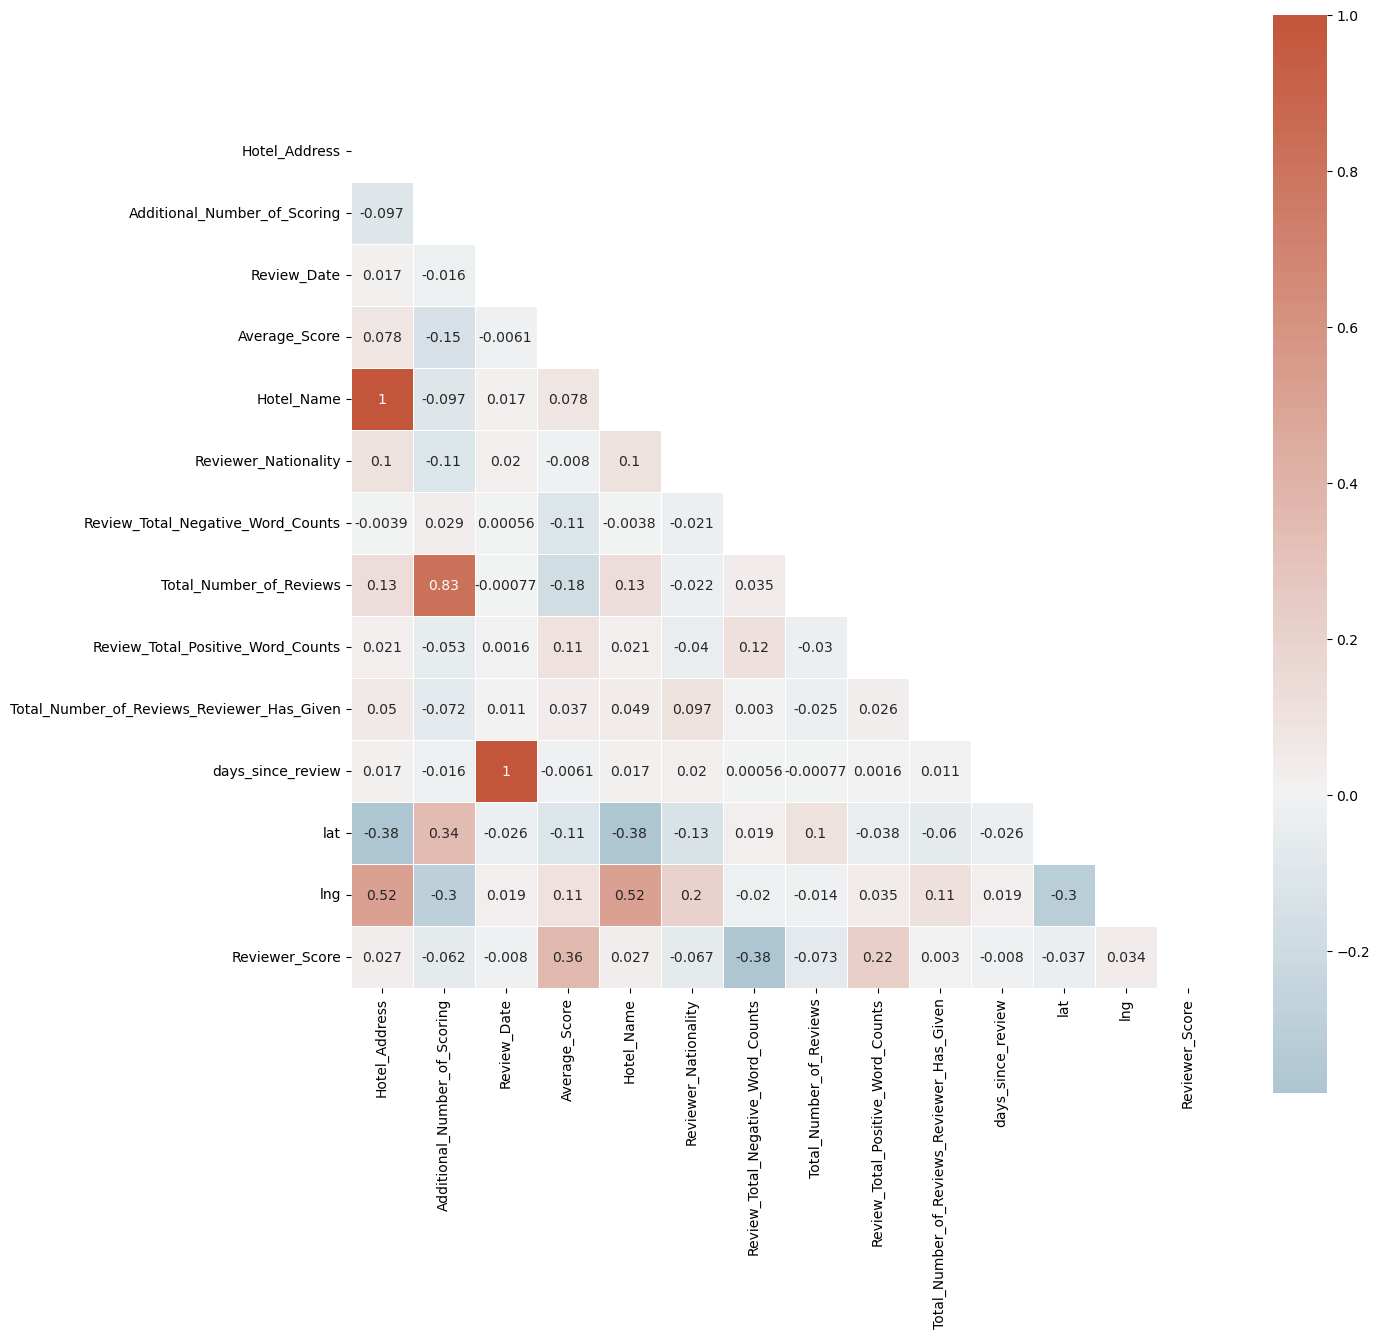

In [ ]:
corr_matrix = hotel_rm.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, cmap=cmap, mask=mask, center=0, square=True, linewidths=.5, annot=True)

In [ ]:
for feat in hotel_rm.columns:
  print(f"{feat :<42}{round(hotel_rm[feat].min(), 3) :>10} to {round(hotel_rm[feat].max(), 3)}")

Hotel_Address                                      0 to 1475
Additional_Number_of_Scoring                       1 to 2682
Review_Date                                        0 to 730
Average_Score                                    5.2 to 9.8
Hotel_Name                                         0 to 1474
Reviewer_Nationality                               0 to 226
Review_Total_Negative_Word_Counts                  0 to 408
Total_Number_of_Reviews                           43 to 16670
Review_Total_Positive_Word_Counts                  0 to 395
Total_Number_of_Reviews_Reviewer_Has_Given         1 to 355
days_since_review                                  0 to 730
lat                                           41.328 to 52.4
lng                                            -0.37 to 16.429
Reviewer_Score                                   2.5 to 10.0


(array([     0.,  10642.,  41443., 126586., 333273.]),
 array([ 0.,  2.,  4.,  6.,  8., 10.]),
 <BarContainer object of 5 artists>)

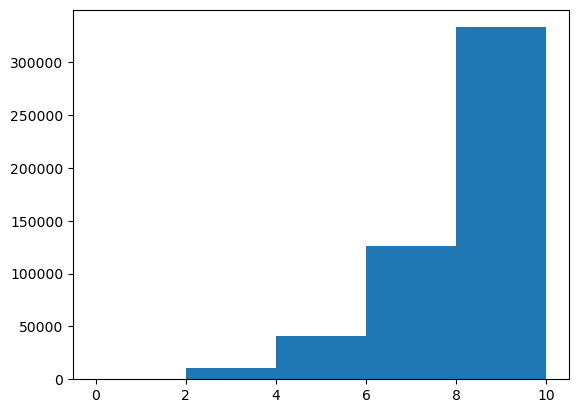

In [ ]:
# histogram của Reviewer_Score
# với mỗi bins cách nhau 1.5 điểm
# vì mình có khoản của Reviewer_Score chạy từ 2.5 cho tới 10
# và chia thành 5 khoản cho giống hệ thống 5 sao
# khoảng điểm là 7.5
plt.hist(x=hotel_rm["Reviewer_Score"], bins=[0, 2, 4, 6, 8, 10])

(array([6.50000e+01, 0.00000e+00, 1.16300e+03, 8.30500e+03, 1.77610e+04,
        6.65150e+04, 1.67904e+05, 1.42485e+05, 9.62570e+04, 1.14890e+04]),
 array([5.2 , 5.66, 6.12, 6.58, 7.04, 7.5 , 7.96, 8.42, 8.88, 9.34, 9.8 ]),
 <BarContainer object of 10 artists>)

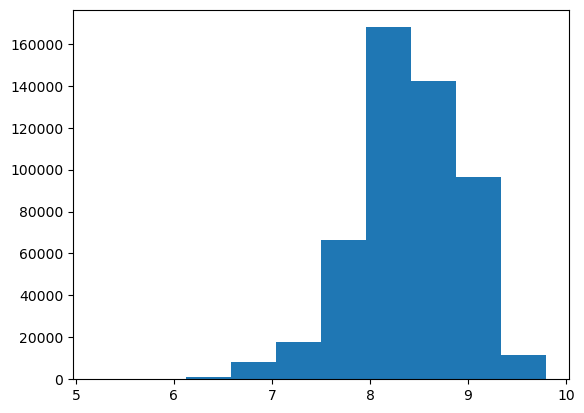

In [ ]:
plt.hist(x=hotel_rm["Average_Score"])

In [ ]:
tnw = np.array(hotel_rm["Review_Total_Negative_Word_Counts"])
tpw = np.array(hotel_rm["Review_Total_Positive_Word_Counts"])
hotel_rm["positive/total"] = tpw/(tpw+tnw+1)
#(số chữ tích cực/ tổng số chữ tiêu cực và tích cực) có trong trong bình luận

# TF-IDF

In [ ]:
tfv = TfidfVectorizer(min_df=3,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

rv_cnt = hotel["Review_Content"].to_list()

tfv.fit(rv_cnt)
X_train_tfv =  tfv.transform(rv_cnt)


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


In [ ]:
rv_cnt = [str.lower() for str in rv_cnt]

In [ ]:
for i in range(len(rv_cnt)):
  rv_cnt[i] = " ".join([word for word in rv_cnt[i].split(" ") if word not in stop_word_list])

In [ ]:
print(X_train_tfv)

  (0, 650727)	0.03275832210337073
  (0, 649124)	0.08140351475065515
  (0, 649123)	0.07347038150456132
  (0, 648893)	0.0349246238212054
  (0, 648800)	0.08407517703215059
  (0, 648093)	0.06409333577843802
  (0, 647939)	0.054459001701473504
  (0, 646122)	0.0430509741756912
  (0, 640196)	0.0787318524691597
  (0, 640120)	0.05438842155258499
  (0, 635709)	0.03626947045078651
  (0, 635534)	0.08407517703215059
  (0, 635086)	0.035358992221654374
  (0, 635075)	0.08260485517834984
  (0, 630733)	0.05816786705576589
  (0, 630518)	0.0395662933301071
  (0, 630245)	0.06235847967698149
  (0, 629830)	0.03633614012514833
  (0, 629827)	0.08407517703215059
  (0, 629823)	0.07017070806419241
  (0, 629614)	0.08260485517834984
  (0, 629607)	0.05709700871238312
  (0, 626186)	0.08140351475065515
  (0, 626181)	0.06093714786250006
  (0, 625959)	0.026616542954662484
  :	:
  (511942, 135520)	0.11822587511283063
  (511942, 132208)	0.3376372982655625
  (511942, 131400)	0.08809264376878383
  (511942, 65252)	0.200012095